In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithms
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

In [2]:
# Load the dataset
from google.colab import files

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/sample_data/BIPOLAR DISORDER.csv')  # Replace with your actual file name
# Display the processed DataFrame
print("Default Dataset:")
display(df)

# Save the processed DataFrame to a CSV file
df.to_csv('Default_dataset.csv', index=False)
print("Default dataset saved as 'Default_dataset.csv'")

Default Dataset:


,Timestamp,Name,Age Group,Gender,Employment Status,Unnamed: 5,Have you or someone you know been diagnosed with bipolar disorder?,"If yes ,then how long ago?\n",How often do you experience periods of intense Happiness?,"During high-energy periods, do you find yourself excessively active or talkative?",...,How would you describe the overall impact of mood swings on your daily life?,Have you experienced any change in appetite and weight during mood episodes?,Have you faced any difficulties in maintaing focused and concentration during extreme emotional state?\n,Do you tend to avoid or reduce participation in social activities when experiencing manic episodes?,Are there specific triggers that tend to precede your mood episodes?\n,Are you currently receiving treatment for bipolar disorder?,What type of treatment have you received for bipolar disorder?,How do your family and friends support you in managing bipolar disorder?,Do you feel optimistic(confident) about your future managing bipolar disorder?,Are there any specific goals or improvement you hope to achieve in your journey with bipolar disorder?
0,12/1/2023 21:25:17,NaN,under 20,Female,Student,Very familiar,Yes,Few years ago,Occasionally,Often,...,Moderate,Moderate,Significant,Frequently,Occasionally,No,NaN,Always,Slightly yes,Yes
1,12/1/2023 23:26:30,NaN,20-25,Female,Student,Very familiar,Yes,Recently,Frequently,Always,...,Moderate,Moderate,Severe,Occasionally,Frequently,Yes,Threapy,Always,Slightly yes,Yes
2,12/1/2023 23:28:33,NaN,under 20,Female,Student,Somewhat familiar,Yes,Recently,Rarely,Often,...,Significant,Significant,Significant,Occasionally,Occasionally,No,NaN,Rarely or never,No,No
3,12/1/2023 23:31:07,NaN,20-25,Male,Student,Somewhat familiar,Prefer not to say,Never,Occasionally,Often,...,Moderate,Significant,Significant,Frequently,Always,No,NaN,Frequently,No,No
4,12/1/2023 23:31:08,NaN,20-25,Female,Unemployed,Very familiar,Yes,Recently,Occasionally,Sometimes,...,Moderate,Severe,Severe,Always,Frequently,No,NaN,Rarely or never,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,12/13/2023 15:09:42,Allaudin,above 35,Male,Employed,Somewhat familiar,Yes,Recently,Occasionally,Sometimes,...,Moderate,Moderate,Moderate,Never,Occasionally,Yes,Medication,Always,Slightly yes,Yes
149,12/13/2023 15:10:16,Orhan,above 35,Male,Unemployed,Somewhat familiar,No,Never,Occasionally,Often,...,Significant,Significant,Moderate,Frequently,Frequently,Yes,Medication,Occasionally,No,Yes
150,12/13/2023 15:10:48,Alyan,25-35,Female,Employed,Very familiar,Yes,Recently,Occasionally,Sometimes,...,Minimal,Moderate,Significant,Frequently,Frequently,No,NaN,Occasionally,Slightly yes,Yes
151,12/13/2023 15:10:57,Bilal,above 35,Male,Unemployed,Somewhat familiar,No,Few years ago,Frequently,Sometimes,...,Significant,Significant,Significant,Always,Frequently,Yes,Threapy,Always,Slightly yes,Yes


Default dataset saved as 'Default_dataset.csv'


# Data Preprocessing

In [3]:
# Remove unnecessary columns
df = df.drop(columns=['Timestamp', 'Name'])

# Remove rows where the target is "Prefer not to say"
df = df[df['Have you or someone you know been diagnosed with bipolar disorder?'] != 'Prefer not to say']

# Remove unnamed colume
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Handle missing values
df = df.fillna('Unknown')

# Encode categorical variables
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Display the processed DataFrame
print("Processed Dataset:")
display(df)

# Save the processed DataFrame to a CSV file
df.to_csv('processed_dataset.csv', index=False)
print("Processed dataset saved as 'processed_dataset.csv'")

Processed Dataset:


,Age Group,Gender,Employment Status,Have you or someone you know been diagnosed with bipolar disorder?,"If yes ,then how long ago?\n",How often do you experience periods of intense Happiness?,"During high-energy periods, do you find yourself excessively active or talkative?",How would you describe your sleep patterns during mood changes?,Have you engaged in impulsive or risky activities during elevated mood periods?,"Do you experience persistent sadness, low energy, or loss of interest in activities?",...,How would you describe the overall impact of mood swings on your daily life?,Have you experienced any change in appetite and weight during mood episodes?,Have you faced any difficulties in maintaing focused and concentration during extreme emotional state?\n,Do you tend to avoid or reduce participation in social activities when experiencing manic episodes?,Are there specific triggers that tend to precede your mood episodes?\n,Are you currently receiving treatment for bipolar disorder?,What type of treatment have you received for bipolar disorder?,How do your family and friends support you in managing bipolar disorder?,Do you feel optimistic(confident) about your future managing bipolar disorder?,Are there any specific goals or improvement you hope to achieve in your journey with bipolar disorder?
0,3,0,1,1,0,2,1,1,3,1,...,1,1,3,1,3,0,2,0,2,1
1,0,0,1,1,2,1,0,2,3,1,...,1,1,2,3,1,1,1,0,2,1
2,3,0,1,1,2,3,1,1,3,0,...,3,3,3,3,3,0,2,3,0,0
4,0,0,2,1,2,2,3,2,1,3,...,1,2,2,0,1,0,2,3,0,1
5,0,0,1,0,1,1,0,0,3,3,...,3,3,2,1,3,0,2,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,2,1,0,1,2,2,3,2,1,1,...,1,1,1,2,3,1,0,0,2,1
149,2,1,2,0,1,2,1,0,3,1,...,3,3,1,1,1,1,0,2,0,1
150,1,0,0,1,2,2,3,2,3,2,...,0,1,3,1,1,0,2,2,2,1
151,2,1,2,0,0,1,3,2,1,3,...,3,3,3,0,1,1,1,0,2,1


Processed dataset saved as 'processed_dataset.csv'


# Feature Selection

In [4]:
# Separate features and target
X = df.drop(columns=['Have you or someone you know been diagnosed with bipolar disorder?'])
y = df['Have you or someone you know been diagnosed with bipolar disorder?']

# Split the data into training and testing sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize/Scale data

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Data Visualization

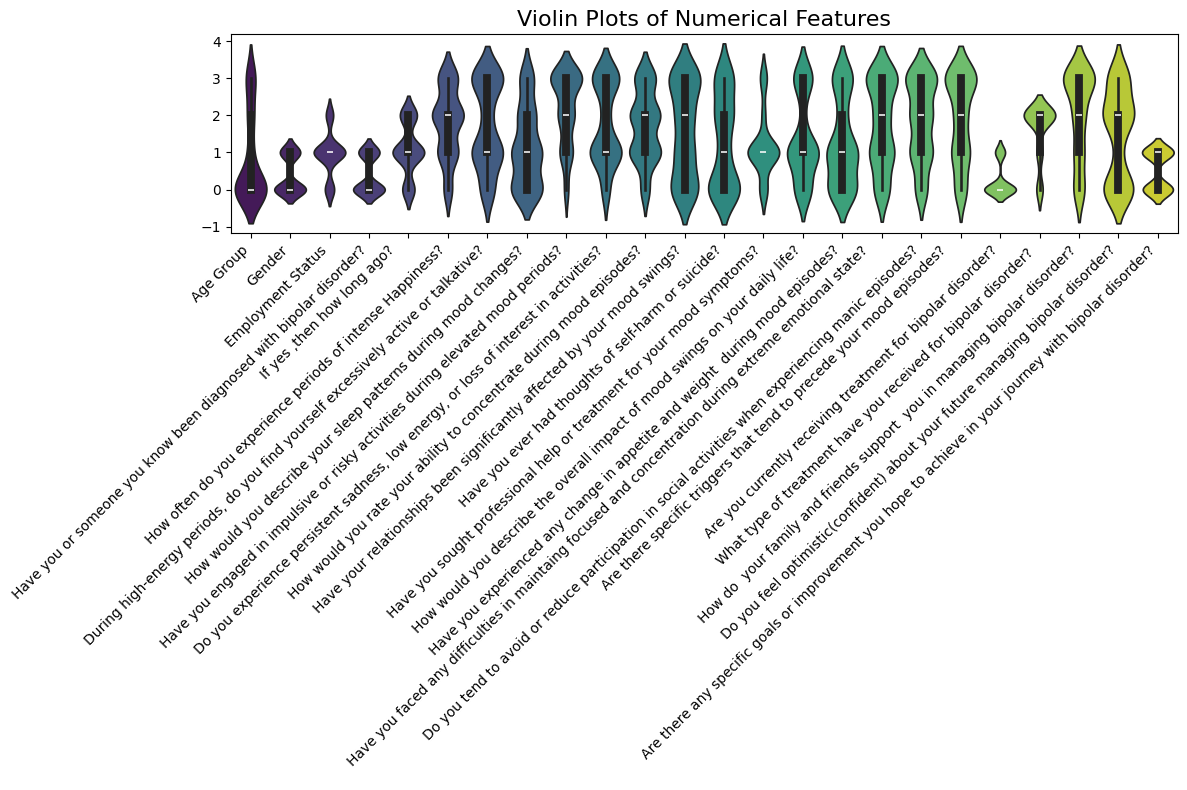

In [7]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, palette='viridis')
plt.title('Violin Plots of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Function for Evaluate Models

In [8]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve (for binary classification only)
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} ROC Curve')
        plt.legend()
        plt.show()

# **Apply Algorithm (Supervised)**

# Support Vector Machine (SVM)

SVM Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        18
           1       0.50      0.43      0.46         7

    accuracy                           0.72        25
   macro avg       0.64      0.63      0.64        25
weighted avg       0.71      0.72      0.71        25



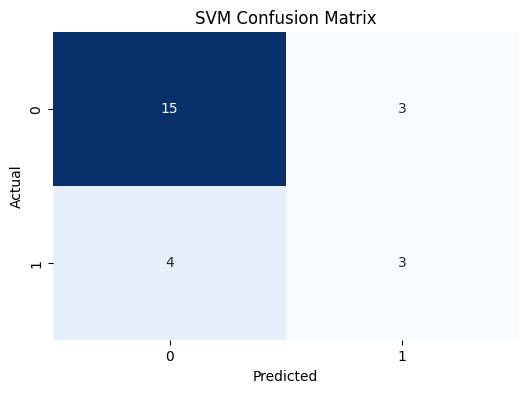

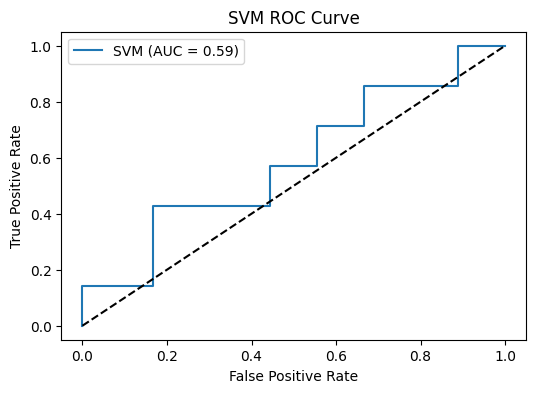

In [9]:
svm_model = SVC(probability=True)
evaluate_model(svm_model, X_train, X_test, y_train, y_test, "SVM")

# Random Forest

Random Forest Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.60      0.43      0.50         7

    accuracy                           0.76        25
   macro avg       0.70      0.66      0.67        25
weighted avg       0.74      0.76      0.75        25



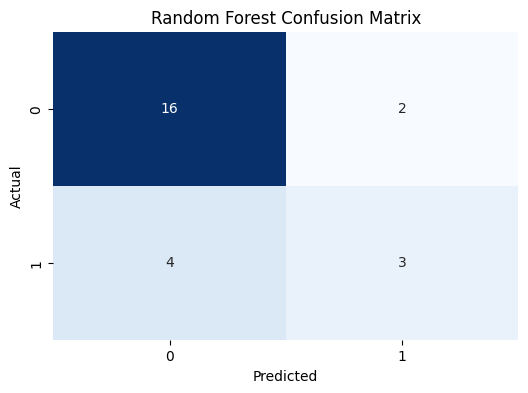

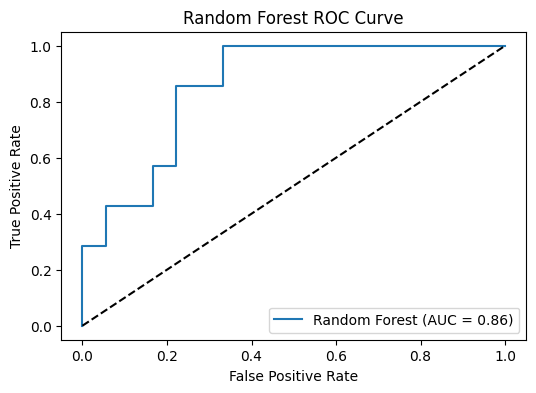

In [10]:
rf_model = RandomForestClassifier(random_state=42)
evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")

# Logistic Regression

Logistic Regression Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.74      0.78      0.76        18
           1       0.33      0.29      0.31         7

    accuracy                           0.64        25
   macro avg       0.54      0.53      0.53        25
weighted avg       0.62      0.64      0.63        25



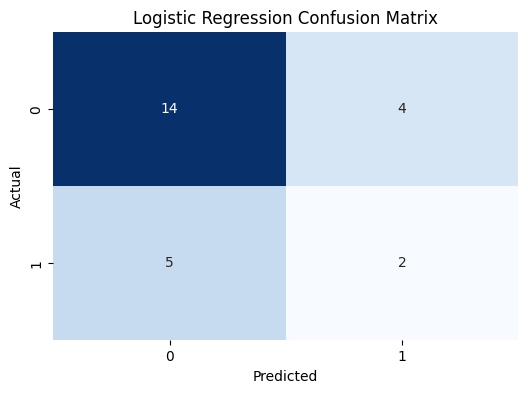

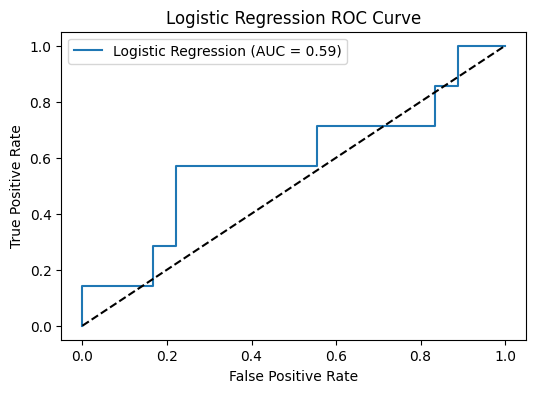

In [11]:
lr_model = LogisticRegression(random_state=42)
evaluate_model(lr_model, X_train, X_test, y_train, y_test, "Logistic Regression")

# KNN

KNN Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       0.75      0.43      0.55         7

    accuracy                           0.80        25
   macro avg       0.78      0.69      0.71        25
weighted avg       0.79      0.80      0.78        25



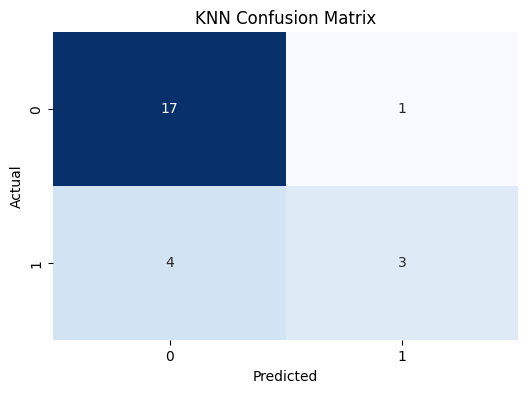

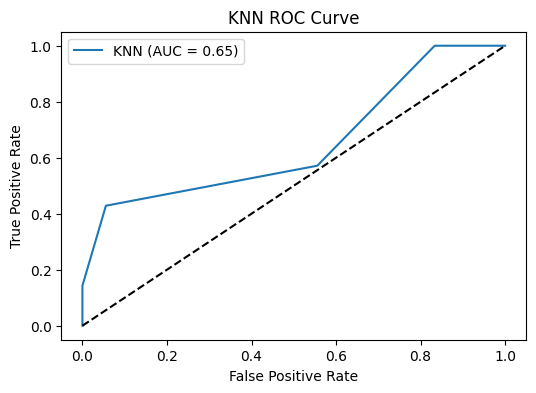

In [12]:
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train, X_test, y_train, y_test, "KNN")

# Naive Bayes

Naive Bayes Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        18
           1       0.50      0.43      0.46         7

    accuracy                           0.72        25
   macro avg       0.64      0.63      0.64        25
weighted avg       0.71      0.72      0.71        25



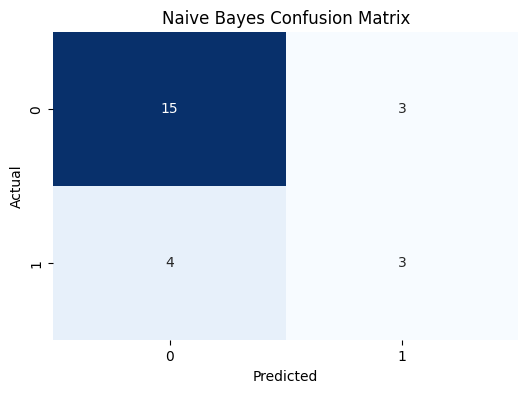

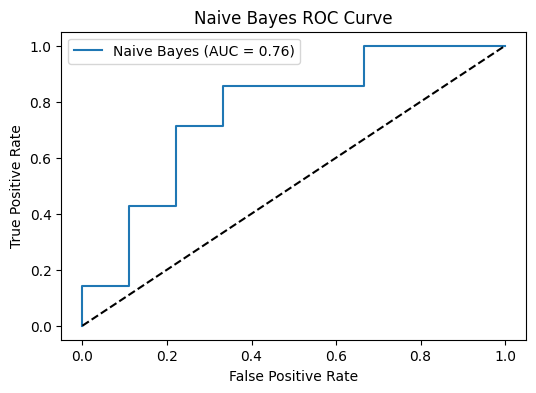

In [13]:
nb_model = GaussianNB()
evaluate_model(nb_model, X_train, X_test, y_train, y_test, "Naive Bayes")

# Decision Tree

Decision Tree Accuracy: 0.96
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.88      1.00      0.93         7

    accuracy                           0.96        25
   macro avg       0.94      0.97      0.95        25
weighted avg       0.96      0.96      0.96        25



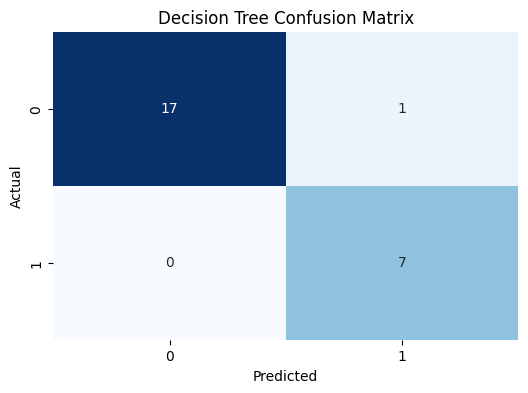

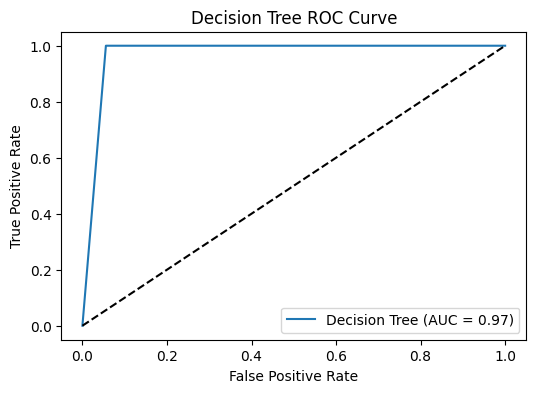

In [14]:
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_model, X_train, X_test, y_train, y_test, "Decision Tree")

# Linear Regression

Linear Regression Accuracy: 0.60
              precision    recall  f1-score   support

           0       0.75      0.67      0.71        18
           1       0.33      0.43      0.38         7

    accuracy                           0.60        25
   macro avg       0.54      0.55      0.54        25
weighted avg       0.63      0.60      0.61        25



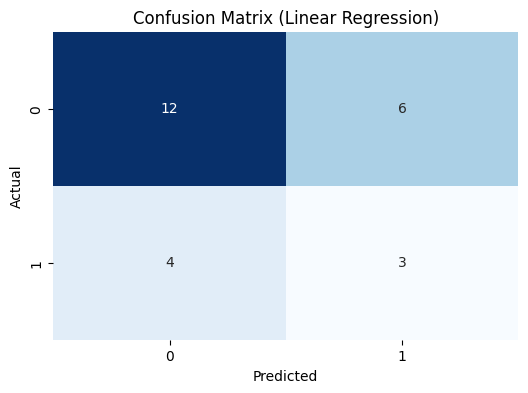

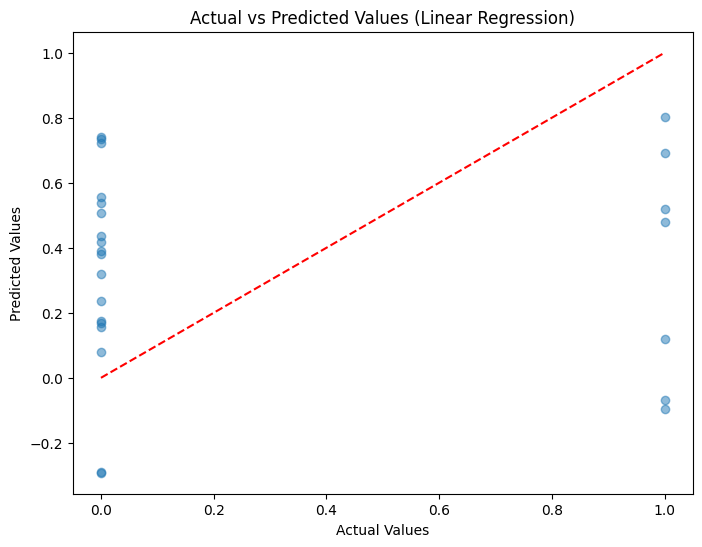

In [15]:
# Train the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)
y_pred_binary = np.round(y_pred).astype(int)  # Convert to binary predictions

# Evaluate
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Linear Regression Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred_binary))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Linear Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Scatter Plot of Actual vs Predicted Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.show()

# Neural Network

Neural Network Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.76      0.72      0.74        18
           1       0.38      0.43      0.40         7

    accuracy                           0.64        25
   macro avg       0.57      0.58      0.57        25
weighted avg       0.66      0.64      0.65        25



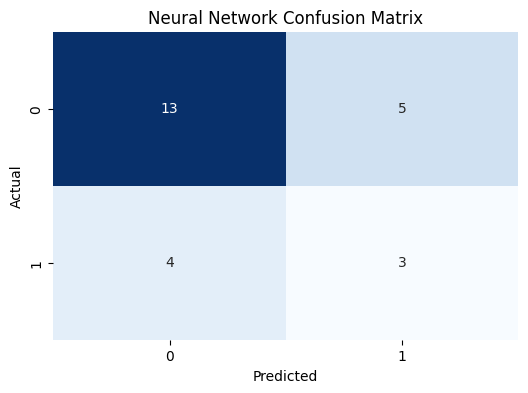

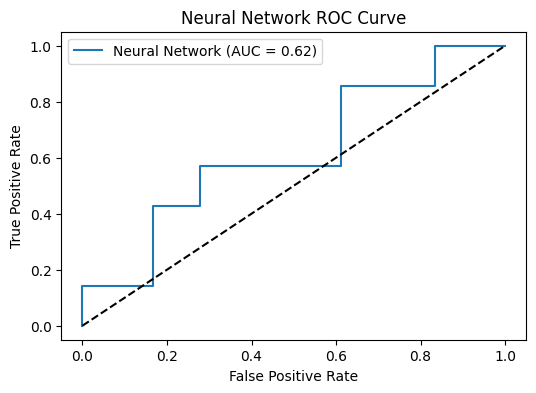

In [16]:
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
evaluate_model(nn_model, X_train, X_test, y_train, y_test, "Neural Network")

# **Apply Algorithm (Unsupervised)**

# k-Means Clustering (Unsupervised, for comparison)

k-Means Adjusted Rand Index (with PCA): -0.03


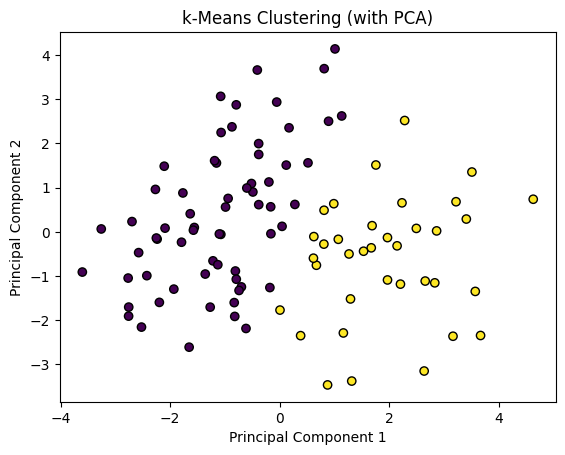

In [17]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_train)

# Apply k-Means on the reduced data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)

# Compare clusters with actual labels
ari = adjusted_rand_score(y_test, kmeans.predict(pca.transform(X_test)))
print(f"k-Means Adjusted Rand Index (with PCA): {ari:.2f}")

# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k')
plt.title('k-Means Clustering (with PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN Adjusted Rand Index: 0.00


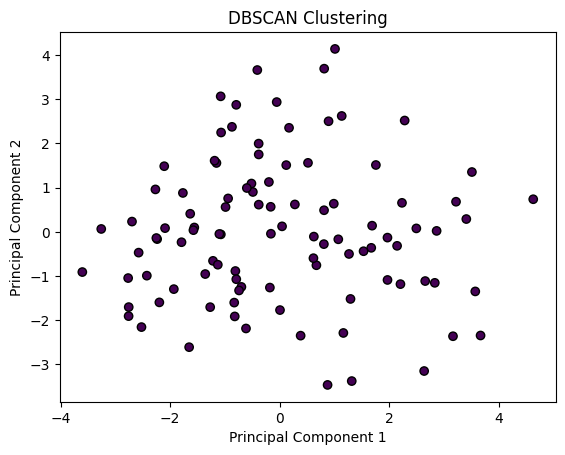

In [18]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You can tune eps and min_samples
dbscan_labels = dbscan.fit_predict(X_train)

# Compare clusters with actual labels
ari_dbscan = adjusted_rand_score(y_train, dbscan_labels)
print(f"DBSCAN Adjusted Rand Index: {ari_dbscan:.2f}")

# Visualize DBSCAN clusters (if using PCA)
if hasattr(dbscan, 'labels_'):
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', edgecolor='k')
    plt.title('DBSCAN Clustering')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Agglomerative Clustering (hierarchical clustering algorithm)

Agglomerative Clustering Adjusted Rand Index: 0.07


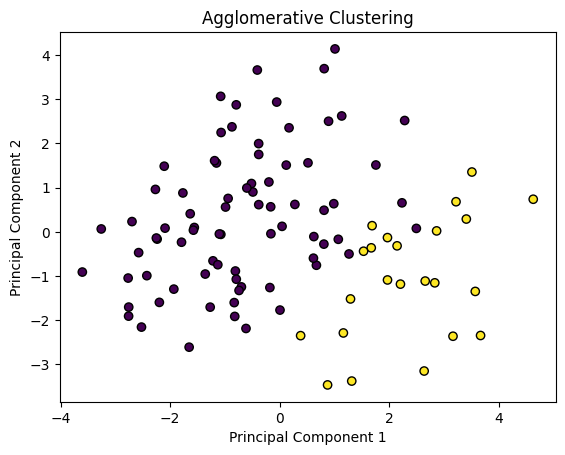

In [19]:
agglo = AgglomerativeClustering(n_clusters=2)  # Use n_clusters=2 for binary classification
agglo_labels = agglo.fit_predict(X_train)

# Compare clusters with actual labels
ari_agglo = adjusted_rand_score(y_train, agglo_labels)
print(f"Agglomerative Clustering Adjusted Rand Index: {ari_agglo:.2f}")

# Visualize Agglomerative Clustering (if using PCA)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglo_labels, cmap='viridis', edgecolor='k')
plt.title('Agglomerative Clustering') # Fixed indentation
plt.xlabel('Principal Component 1') # Fixed indentation
plt.ylabel('Principal Component 2') # Fixed indentation
plt.show() # Fixed indentation

#Compare all models

In [20]:
# Compare all models
results = {
    'Model': ['SVM', 'Random Forest', 'Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'Linear Regression', 'Neural Network', 'k-Means', 'DBSCAN', 'Agglomerative Clustering'],
    'Accuracy': [
        accuracy_score(y_test, svm_model.predict(X_test)),  # SVM
        accuracy_score(y_test, rf_model.predict(X_test)),   # Random Forest
        accuracy_score(y_test, lr_model.predict(X_test)),   # Logistic Regression
        accuracy_score(y_test, knn_model.predict(X_test)),  # KNN
        accuracy_score(y_test, nb_model.predict(X_test)),   # Naive Bayes
        accuracy_score(y_test, dt_model.predict(X_test)),   # Decision Tree
        accuracy_score(y_test, np.round(lin_reg.predict(X_test)).astype(int)),  # Linear Regression
        accuracy_score(y_test, nn_model.predict(X_test)),   # Neural Network
        ari,  # k-Means
        ari_dbscan,  # DBSCAN
        ari_agglo   # Agglomerative Clustering
    ]
}

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
print(results_df)

                       Model  Accuracy
0                        SVM  0.720000
1              Random Forest  0.760000
2        Logistic Regression  0.640000
3                        KNN  0.800000
4                Naive Bayes  0.720000
5              Decision Tree  0.960000
6          Linear Regression  0.600000
7             Neural Network  0.640000
8                    k-Means -0.032702
9                     DBSCAN  0.000000
10  Agglomerative Clustering  0.066516


# Visualize Model Comparison

<ipython-input-21-de931103c7b2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')


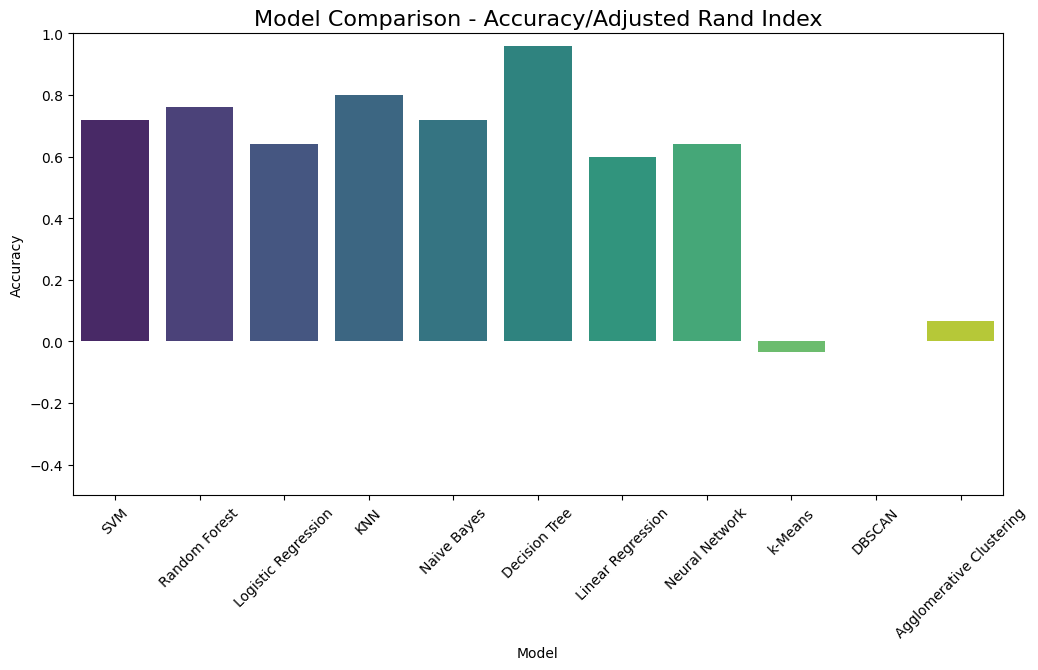

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Comparison - Accuracy/Adjusted Rand Index', fontsize=16)
plt.ylim(-0.5, 1)  # Adjusted to include negative values
plt.xticks(rotation=45)
plt.show()

# Hyperparameter tuning on Top three Model

**Hyperparameter tuning on Decision Tree**

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tuned Decision Tree Accuracy: 0.96
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.88      1.00      0.93         7

    accuracy                           0.96        25
   macro avg       0.94      0.97      0.95        25
weighted avg       0.96      0.96      0.96        25



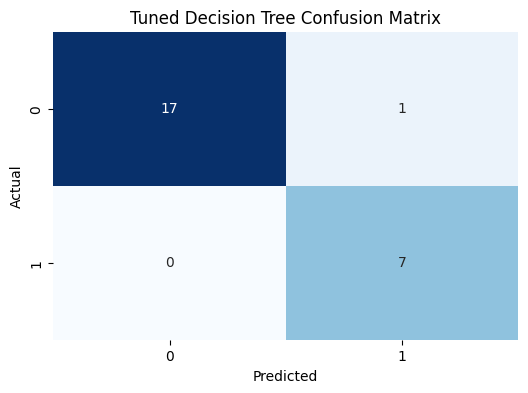

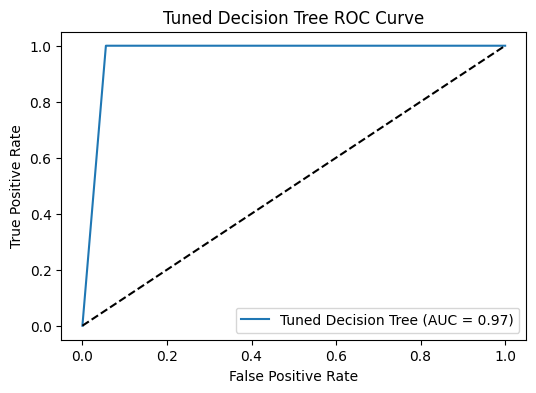

In [22]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],        # Minimum samples required at a leaf node
    'criterion': ['gini', 'entropy']      # Splitting criterion
}

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Evaluate the best model using the evaluate_model function
evaluate_model(best_dt_model, X_train, X_test, y_train, y_test, "Tuned Decision Tree")

**Hyperparameter tuning on KNN**

Best Hyperparameters: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Tuned KNN Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        18
           1       0.60      0.43      0.50         7

    accuracy                           0.76        25
   macro avg       0.70      0.66      0.67        25
weighted avg       0.74      0.76      0.75        25



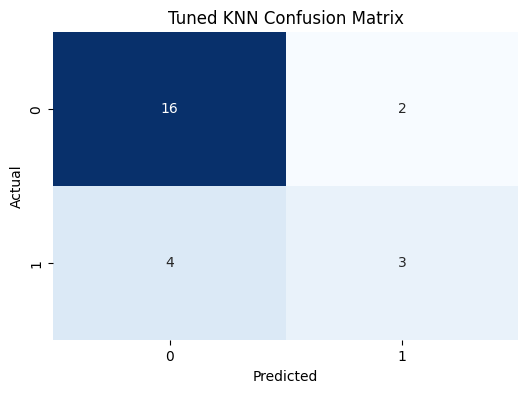

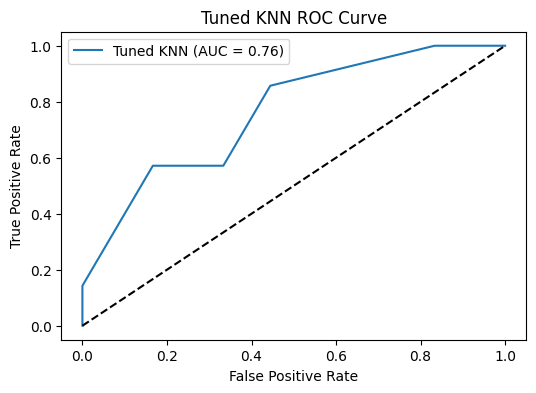

In [23]:
# Scale the training and testing data for KNN
scaler = StandardScaler()  # You might already have this from before
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'p': [1, 2, 3]  # Distance metric (1: Manhattan, 2: Euclidean, 3: Minkowski)
}

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_knn_model = grid_search.best_estimator_

# Evaluate the best model using the evaluate_model function
evaluate_model(best_knn_model, X_train, X_test, y_train, y_test, "Tuned KNN")

**Hyperparameter tuning on Random Forest**

In [ ]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees
    'max_depth': [None, 10, 20, 30],         # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],         # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2'],        # Number of features to consider for splitting
    'bootstrap': [True, False]               # Whether to use bootstrap samples
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model using the evaluate_model function
evaluate_model(best_rf_model, X_train, X_test, y_train, y_test, "Tuned Random Forest")

# Cross-Validation on Top Two Model

**Cross-Validation on Decision Tree**

In [ ]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())

# Train the model on the full training set
dt_model.fit(X_train, y_train)

# Calculate training accuracy
train_accuracy = dt_model.score(X_train, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Calculate test accuracy
test_accuracy = dt_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

**Cross-Validation on hyperparameter tuning (Random Forest)**

In [ ]:
# Perform cross-validation on the best Random Forest model
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Random Forest Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Random Forest Cross-Validation Accuracy:", cv_scores.mean())

# Train the best Random Forest model on the full training set
best_rf_model.fit(X_train, y_train)

# Calculate training accuracy
train_accuracy = best_rf_model.score(X_train, y_train)
print(f"Random Forest Training Accuracy: {train_accuracy:.2f}")

# Calculate test accuracy
test_accuracy = best_rf_model.score(X_test, y_test)
print(f"Random Forest Test Accuracy: {test_accuracy:.2f}")

# Which Model is Best?

The **Decision Tree** is the best model for your dataset because it has a higher test accuracy of 96% compared to the Random Forest's 80%. Both models have the same cross-validation accuracy of 85%, meaning they perform similarly across different subsets of the data. The Decision Tree is simpler and easier to interpret, which is an advantage over the more complex Random Forest. Despite both models overfitting the training data with 100% training accuracy, the Decision Tree generalizes better to the test set. The Random Forest underperforms in this case, likely due to suboptimal hyperparameters or dataset characteristics.